# PREDICTING TRAFFIC DENSITY

IBB provides us hourly traffic density and weather dataset. We will combine these datasets and create a model to predict hourly traffic density.

In [348]:
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as py
import geopy
import geocoder
import glob
import os
import seaborn as sns

## IMPORTING TRAFFIC DATA FILES 

https://data.ibb.gov.tr/dataset/hourly-traffic-density-data-set7
These datasets are given monthly. So we need to download it seperately in a folder, then merge it with code

In [349]:
path = r'C:/Users/PIT80/Downloads/traffic' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [350]:
trafik=frame

In [351]:
trafik.groupby('GEOHASH')['NUMBER_OF_VEHICLES'].median().reset_index()

,GEOHASH,NUMBER_OF_VEHICLES
0,sx7chk,17.0
1,sx7chm,26.0
2,sx7cht,23.0
3,sx7chw,30.0
4,sx7chx,31.0
...,...,...
2325,sxm41s,14.0
2326,sxm41u,14.0
2327,sxm445,13.0
2328,sxm44h,13.0


In [352]:
trafik['GEOHASH'].nunique()

2330

In [353]:
import reverse_geocoder as rg

In [354]:
trafik

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,2020-01-03 13:00:00,28.8,41.1,sxk9bk,9,78,53,105
1,2020-01-16 07:00:00,29.2,41.0,sxk9r3,6,64,27,68
2,2020-01-17 20:00:00,28.5,41.0,sxk1rz,53,96,72,11
3,2020-01-14 22:00:00,29.4,40.8,sxkbhn,17,128,73,216
4,2020-01-17 20:00:00,28.8,41.0,sxk906,16,82,55,123
...,...,...,...,...,...,...,...,...
15233816,2020-12-21 02:00:00,29.3,40.9,sxkbgk,8,154,76,115
15233817,2020-12-11 18:00:00,29.3,41.0,sxkc5t,41,129,76,48
15233818,2020-12-15 20:00:00,28.9,41.0,sxk92y,6,42,18,85
15233819,2020-12-15 07:00:00,28.8,41.1,sxk3x1,6,81,30,179


In [355]:
trafik = trafik.dropna()

## ADDING PROVINCE COLUMN TO OUR DATASET

In [356]:
# Convert lat and long columns to a tuple of tuples
coords_1 = tuple(zip(trafik['LATITUDE'], trafik['LONGITUDE']))

results_rg1 = rg.search(coords_1)
results_name_1 = [x.get('name') for x in results_rg1]
results_admin1_1 = [x.get('admin1') for x in results_rg1]
results_lat_1 = [x.get('lat') for x in results_rg1]
results_lon_1 = [x.get('lon') for x in results_rg1]

# Optional: insert admin2 results into new df column
trafik['province'] = results_name_1
trafik['city'] = results_admin1_1
trafik['rlat'] = results_lat_1
trafik['rlong'] = results_lon_1

Removing wrong latitudes and longitudes.

In [357]:
trafik['LONGITUDE'].isnull().sum()

0

In [358]:
trafik[(trafik['LATITUDE']<20)]

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,province,city,rlat,rlong


In [359]:
trafik[(trafik['province']=='Umraniye')]

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,province,city,rlat,rlong
1,2020-01-16 07:00:00,29.2,41.0,sxk9r3,6,64,27,68,Umraniye,Istanbul,41.01643,29.12476
23,2020-01-14 05:00:00,29.1,41.0,sxk9qk,7,83,35,78,Umraniye,Istanbul,41.01643,29.12476
44,2020-01-21 17:00:00,29.2,41.0,sxk9pw,6,112,29,540,Umraniye,Istanbul,41.01643,29.12476
75,2020-01-16 16:00:00,29.1,41.0,sxk9mc,6,113,41,246,Umraniye,Istanbul,41.01643,29.12476
122,2020-01-30 07:00:00,29.2,41.1,sxk9x3,79,137,104,14,Umraniye,Istanbul,41.01643,29.12476
...,...,...,...,...,...,...,...,...,...,...,...,...
15233732,2020-12-14 08:00:00,29.1,41.1,sxk9tg,6,66,35,51,Umraniye,Istanbul,41.01643,29.12476
15233734,2020-12-19 07:00:00,29.1,41.1,sxk9vu,21,70,49,12,Umraniye,Istanbul,41.01643,29.12476
15233767,2020-12-01 17:00:00,29.2,41.0,sxk9rq,18,84,62,240,Umraniye,Istanbul,41.01643,29.12476
15233799,2020-12-02 10:00:00,29.1,41.0,sxk9mv,6,104,46,137,Umraniye,Istanbul,41.01643,29.12476


We just analyze the Istanbul Data, so there is no need for another city.

In [360]:
trafik=trafik[(trafik['city']=='Istanbul')]

In [361]:
traffic = trafik

## IMPORTING WEATHER DATA

https://data.ibb.gov.tr/dataset/meteorology-observation-station-data-set

In [362]:
path = r'C:/Users/PIT80/Downloads/weather' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

weather = pd.concat(li, axis=0, ignore_index=True)

In [363]:
weather.columns

Index(['DATE_TIME', 'OBSERVATORY_NAME', 'SENSOR_TYPE', 'MINIMUM_TEMPERATURE',
       'MAXIMUM_TEMPERATURE', 'AVERAGE_TEMPERATURE', 'MINIMUM_HUMIDITY',
       'MAXIMUM_HUMIDITY', 'AVERAGE_HUMIDITY', 'MINIMUM_WIND', 'MAXIMUM_WIND',
       'AVERAGE_WIND', 'MINIMUM_DIRECTIONOFWIND', 'MAXIMUM_DIRECTIONOFWIND',
       'AVERAGE_DIRECTIONOFWIND', 'MINIMUM_PRECIPITATION',
       'MAXIMUM_PRECIPITATION', 'AVERAGE_PRECIPITATION',
       'MINIMUM_ROAD_TEMPERATURE', 'MAXIMUM_ROAD_TEMPERATURE',
       'AVERAGE_ROAD_TEMPERATURE', 'MINIMUM_FELT_TEMPERATURE',
       'MAXIMUM_FELT_TEMPERATURE', 'AVERAGE_FELT_TEMPERATURE'],
      dtype='object')

We filter traffic and weather data just for a point for Umraniye.

In [364]:
weather=weather[(weather['OBSERVATORY_NAME']=='UMRANIYE')]

In [365]:
weather1 = weather[['DATE_TIME','AVERAGE_PRECIPITATION','AVERAGE_ROAD_TEMPERATURE']]

In [366]:
traffic = traffic[(traffic['GEOHASH']=='sxk9pw')]

In [367]:
traffic

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,province,city,rlat,rlong
44,2020-01-21 17:00:00,29.2,41.0,sxk9pw,6,112,29,540,Umraniye,Istanbul,41.01643,29.12476
443,2020-01-14 09:00:00,29.2,41.0,sxk9pw,6,87,31,359,Umraniye,Istanbul,41.01643,29.12476
1582,2020-01-23 02:00:00,29.2,41.0,sxk9pw,9,160,72,64,Umraniye,Istanbul,41.01643,29.12476
6100,2020-01-17 03:00:00,29.2,41.0,sxk9pw,13,137,72,78,Umraniye,Istanbul,41.01643,29.12476
7728,2020-01-28 02:00:00,29.2,41.0,sxk9pw,10,144,68,85,Umraniye,Istanbul,41.01643,29.12476
...,...,...,...,...,...,...,...,...,...,...,...,...
15204661,2020-12-26 13:00:00,29.2,41.0,sxk9pw,6,140,62,254,Umraniye,Istanbul,41.01643,29.12476
15205044,2020-12-07 19:00:00,29.2,41.0,sxk9pw,6,103,35,472,Umraniye,Istanbul,41.01643,29.12476
15212099,2020-12-25 09:00:00,29.2,41.0,sxk9pw,6,107,43,566,Umraniye,Istanbul,41.01643,29.12476
15219785,2020-12-12 21:00:00,29.2,41.0,sxk9pw,10,117,71,98,Umraniye,Istanbul,41.01643,29.12476


We merge our datasets.

In [368]:
merged = traffic.merge(weather1, on='DATE_TIME', how='left')

In [369]:
merged

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,province,city,rlat,rlong,AVERAGE_PRECIPITATION,AVERAGE_ROAD_TEMPERATURE
0,2020-01-21 17:00:00,29.2,41.0,sxk9pw,6,112,29,540,Umraniye,Istanbul,41.01643,29.12476,31.8,6.4
1,2020-01-14 09:00:00,29.2,41.0,sxk9pw,6,87,31,359,Umraniye,Istanbul,41.01643,29.12476,0.0,10.9
2,2020-01-23 02:00:00,29.2,41.0,sxk9pw,9,160,72,64,Umraniye,Istanbul,41.01643,29.12476,0.0,6.4
3,2020-01-17 03:00:00,29.2,41.0,sxk9pw,13,137,72,78,Umraniye,Istanbul,41.01643,29.12476,0.0,6.8
4,2020-01-28 02:00:00,29.2,41.0,sxk9pw,10,144,68,85,Umraniye,Istanbul,41.01643,29.12476,0.0,10.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8568,2020-12-26 13:00:00,29.2,41.0,sxk9pw,6,140,62,254,Umraniye,Istanbul,41.01643,29.12476,33.9,16.4
8569,2020-12-07 19:00:00,29.2,41.0,sxk9pw,6,103,35,472,Umraniye,Istanbul,41.01643,29.12476,0.0,10.9
8570,2020-12-25 09:00:00,29.2,41.0,sxk9pw,6,107,43,566,Umraniye,Istanbul,41.01643,29.12476,18.0,17.2
8571,2020-12-12 21:00:00,29.2,41.0,sxk9pw,10,117,71,98,Umraniye,Istanbul,41.01643,29.12476,0.0,11.0


In [370]:
merged=merged.set_index('DATE_TIME')

In [371]:
merged = merged.reset_index()

In [372]:
import datetime
from datetime import datetime

In [373]:
merged['DATE_TIME'] = pd.to_datetime(merged['DATE_TIME'])
merged['DAY_OF_WEEK'] = merged['DATE_TIME'].dt.day_name()
merged['HOUR_OF_DAY'] = merged['DATE_TIME'].dt.hour
merged['HOUR_OF_DAY'] = merged['HOUR_OF_DAY'].astype(str)


In [374]:
merged=merged[(merged['AVERAGE_PRECIPITATION']>=0)]
merged

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,province,city,rlat,rlong,AVERAGE_PRECIPITATION,AVERAGE_ROAD_TEMPERATURE,DAY_OF_WEEK,HOUR_OF_DAY
0,2020-01-21 17:00:00,29.2,41.0,sxk9pw,6,112,29,540,Umraniye,Istanbul,41.01643,29.12476,31.8,6.4,Tuesday,17
1,2020-01-14 09:00:00,29.2,41.0,sxk9pw,6,87,31,359,Umraniye,Istanbul,41.01643,29.12476,0.0,10.9,Tuesday,9
2,2020-01-23 02:00:00,29.2,41.0,sxk9pw,9,160,72,64,Umraniye,Istanbul,41.01643,29.12476,0.0,6.4,Thursday,2
3,2020-01-17 03:00:00,29.2,41.0,sxk9pw,13,137,72,78,Umraniye,Istanbul,41.01643,29.12476,0.0,6.8,Friday,3
4,2020-01-28 02:00:00,29.2,41.0,sxk9pw,10,144,68,85,Umraniye,Istanbul,41.01643,29.12476,0.0,10.3,Tuesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8568,2020-12-26 13:00:00,29.2,41.0,sxk9pw,6,140,62,254,Umraniye,Istanbul,41.01643,29.12476,33.9,16.4,Saturday,13
8569,2020-12-07 19:00:00,29.2,41.0,sxk9pw,6,103,35,472,Umraniye,Istanbul,41.01643,29.12476,0.0,10.9,Monday,19
8570,2020-12-25 09:00:00,29.2,41.0,sxk9pw,6,107,43,566,Umraniye,Istanbul,41.01643,29.12476,18.0,17.2,Friday,9
8571,2020-12-12 21:00:00,29.2,41.0,sxk9pw,10,117,71,98,Umraniye,Istanbul,41.01643,29.12476,0.0,11.0,Saturday,21


We can see that working hours have much greater values than off hours.

<AxesSubplot:xlabel='HOUR_OF_DAY', ylabel='NUMBER_OF_VEHICLES'>

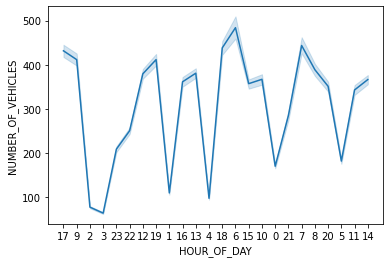

In [375]:
sns.lineplot(data=merged, x='HOUR_OF_DAY', y='NUMBER_OF_VEHICLES')

Weekdays have greater densities.

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='NUMBER_OF_VEHICLES'>

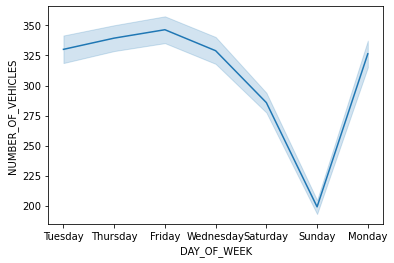

In [376]:
sns.lineplot(data=merged, x='DAY_OF_WEEK', y='NUMBER_OF_VEHICLES')

Average precipitation is a factor, but hours are more effective.

<AxesSubplot:xlabel='AVERAGE_PRECIPITATION', ylabel='NUMBER_OF_VEHICLES'>

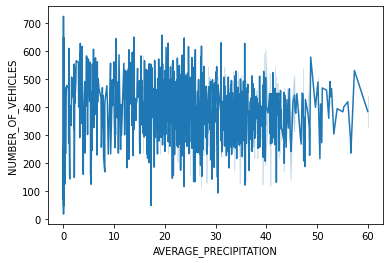

In [377]:
sns.lineplot(data=merged, x='AVERAGE_PRECIPITATION', y='NUMBER_OF_VEHICLES')

We can see that at lower temperatures traffic density is higher

<AxesSubplot:xlabel='AVERAGE_ROAD_TEMPERATURE', ylabel='NUMBER_OF_VEHICLES'>

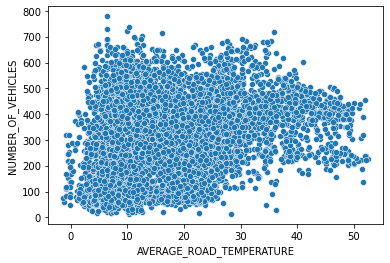

In [378]:
sns.scatterplot(data=merged, x='AVERAGE_ROAD_TEMPERATURE', y='NUMBER_OF_VEHICLES')

In [379]:
merged.dropna(axis=0, how='any', inplace=True)

In [380]:
merged.columns

Index(['DATE_TIME', 'LONGITUDE', 'LATITUDE', 'GEOHASH', 'MINIMUM_SPEED',
       'MAXIMUM_SPEED', 'AVERAGE_SPEED', 'NUMBER_OF_VEHICLES', 'province',
       'city', 'rlat', 'rlong', 'AVERAGE_PRECIPITATION',
       'AVERAGE_ROAD_TEMPERATURE', 'DAY_OF_WEEK', 'HOUR_OF_DAY'],
      dtype='object')

In [381]:
merged1 = merged[['HOUR_OF_DAY','DAY_OF_WEEK','AVERAGE_ROAD_TEMPERATURE','AVERAGE_PRECIPITATION','NUMBER_OF_VEHICLES']]

In [382]:
merged1.dropna(axis=0, how='any', inplace=True)

C:\Users\PIT80\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [383]:
merged1.isnull().sum()

HOUR_OF_DAY                 0
DAY_OF_WEEK                 0
AVERAGE_ROAD_TEMPERATURE    0
AVERAGE_PRECIPITATION       0
NUMBER_OF_VEHICLES          0
dtype: int64

We dummify our categorical variables.

In [384]:
merged1 = pd.get_dummies(merged1)

In [385]:
merged1.AVERAGE_PRECIPITATION.isnull().sum()

0

In [386]:
merged1.columns

Index(['AVERAGE_ROAD_TEMPERATURE', 'AVERAGE_PRECIPITATION',
       'NUMBER_OF_VEHICLES', 'HOUR_OF_DAY_0', 'HOUR_OF_DAY_1',
       'HOUR_OF_DAY_10', 'HOUR_OF_DAY_11', 'HOUR_OF_DAY_12', 'HOUR_OF_DAY_13',
       'HOUR_OF_DAY_14', 'HOUR_OF_DAY_15', 'HOUR_OF_DAY_16', 'HOUR_OF_DAY_17',
       'HOUR_OF_DAY_18', 'HOUR_OF_DAY_19', 'HOUR_OF_DAY_2', 'HOUR_OF_DAY_20',
       'HOUR_OF_DAY_21', 'HOUR_OF_DAY_22', 'HOUR_OF_DAY_23', 'HOUR_OF_DAY_3',
       'HOUR_OF_DAY_4', 'HOUR_OF_DAY_5', 'HOUR_OF_DAY_6', 'HOUR_OF_DAY_7',
       'HOUR_OF_DAY_8', 'HOUR_OF_DAY_9', 'DAY_OF_WEEK_Friday',
       'DAY_OF_WEEK_Monday', 'DAY_OF_WEEK_Saturday', 'DAY_OF_WEEK_Sunday',
       'DAY_OF_WEEK_Thursday', 'DAY_OF_WEEK_Tuesday', 'DAY_OF_WEEK_Wednesday'],
      dtype='object')

In [387]:
merged1['NUMBER_OF_VEHICLES']

0       540
1       359
2        64
3        78
4        85
       ... 
8568    254
8569    472
8570    566
8571     98
8572    240
Name: NUMBER_OF_VEHICLES, Length: 5766, dtype: int64

## LINEAR REGRESSION WITH TENSORFLOW LINEAR REGRESSION

In [270]:
#@title Import modules
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [271]:
from sklearn.preprocessing import StandardScaler

In [272]:
from tensorflow.keras import layers

In [273]:
from tensorflow import keras

In [274]:
train_dataset = merged1.sample(frac=0.8, random_state=42)
test_dataset = merged1.drop(train_dataset.index)

In [275]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('NUMBER_OF_VEHICLES')
test_labels = test_features.pop('NUMBER_OF_VEHICLES')

In [276]:
train_features = train_features.astype(float)
test_features = test_features.astype(float)
train_labels = train_labels.astype(float)
test_labels = test_labels.astype(float)


In [277]:
train_features.dtypes

AVERAGE_ROAD_TEMPERATURE    float64
AVERAGE_PRECIPITATION       float64
HOUR_OF_DAY_0               float64
HOUR_OF_DAY_1               float64
HOUR_OF_DAY_10              float64
                             ...   
DAY_OF_WEEK_Saturday        float64
DAY_OF_WEEK_Sunday          float64
DAY_OF_WEEK_Thursday        float64
DAY_OF_WEEK_Tuesday         float64
DAY_OF_WEEK_Wednesday       float64
Length: 33, dtype: object

In [278]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
AVERAGE_ROAD_TEMPERATURE,17.9,11.0
AVERAGE_PRECIPITATION,12.1,15.9
NUMBER_OF_VEHICLES,308.0,156.1
HOUR_OF_DAY_0,0.0,0.2
HOUR_OF_DAY_1,0.0,0.2
...,...,...
DAY_OF_WEEK_Saturday,0.1,0.4
DAY_OF_WEEK_Sunday,0.1,0.4
DAY_OF_WEEK_Thursday,0.1,0.4
DAY_OF_WEEK_Tuesday,0.1,0.3


In [279]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [280]:
normalizer.adapt(np.array(train_features))

In [281]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,41.3,43.5,95
96,41.3,43.3,96
97,41.3,43.7,97
98,41.3,43.6,98
99,41.3,43.5,99


In [282]:
print(normalizer.mean.numpy())

[[17.869455   12.070274    0.04140474  0.04162151  0.04097117  0.04205508
   0.04335573  0.04205507  0.04140473  0.04032084  0.04118795  0.04140473
   0.04400607  0.04313896  0.04097117  0.04205507  0.04335574  0.03988729
   0.04053761  0.04292218  0.04248863  0.03945372  0.04227185  0.04227185
   0.03880339  0.04205507  0.14459135  0.13938868  0.14914376  0.14957735
   0.14762628  0.13592026  0.13375244]]


In [283]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [284]:
linear_model.predict(train_features[:32])

1/1 [==============================] - 0s 50ms/step


array([[-0.94617623],
       [-1.0221086 ],
       [ 1.5787247 ],
       [ 0.33054793],
       [ 0.7260657 ],
       [ 0.25664085],
       [ 0.01373303],
       [-0.3897835 ],
       [-1.9251517 ],
       [-0.2736559 ],
       [ 1.3571761 ],
       [ 0.46758342],
       [-0.13416868],
       [ 1.0979362 ],
       [-1.808094  ],
       [ 0.30528072],
       [ 2.2774243 ],
       [ 1.2252195 ],
       [-0.03052086],
       [-0.25518423],
       [ 1.5960553 ],
       [ 0.19016296],
       [-0.12430158],
       [ 0.24298656],
       [ 0.6126343 ],
       [ 1.1096588 ],
       [-3.0424862 ],
       [-0.7905295 ],
       [ 0.3424486 ],
       [ 0.6636731 ],
       [-2.6352582 ],
       [-0.8364643 ]], dtype=float32)

In [285]:
linear_model.layers[1].kernel

<tf.Variable 'dense_22/kernel:0' shape=(33, 1) dtype=float32, numpy=
array([[ 0.06076133],
       [-0.08826673],
       [ 0.3663344 ],
       [ 0.02128252],
       [-0.31701225],
       [ 0.12534681],
       [-0.40756086],
       [ 0.23629096],
       [-0.21651198],
       [-0.05375004],
       [ 0.19075182],
       [-0.06497321],
       [ 0.00049257],
       [ 0.34890607],
       [ 0.31018022],
       [ 0.06086922],
       [ 0.18108574],
       [ 0.22510466],
       [ 0.26641193],
       [ 0.27067217],
       [ 0.35337153],
       [-0.38524622],
       [ 0.15980497],
       [ 0.4110761 ],
       [-0.3453913 ],
       [ 0.10093918],
       [-0.24842975],
       [ 0.14759156],
       [-0.27273244],
       [-0.09193486],
       [ 0.04451486],
       [-0.14867494],
       [ 0.15818354]], dtype=float32)>

In [286]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.03),
    loss='mean_absolute_error')

In [287]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 13.1 s


In [288]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,60.0,59.7,95
96,59.7,59.4,96
97,59.4,59.1,97
98,59.2,58.9,98
99,59.0,58.6,99


In [326]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 500])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

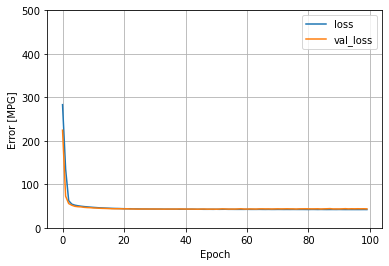

In [327]:
plot_loss(history)

In [312]:
test_results1 = {}

test_results1['linear_model'] = linear_model.evaluate(
    test_features,
    test_labels, verbose=0)

In [313]:
test_results1

{'linear_model': 59.544307708740234}

In [324]:
test_labels.shape

(1153,)

In [336]:
test_labels

3       78.0
4       85.0
5      180.0
9       87.0
16     551.0
        ... 
8552   140.0
8559   363.0
8561    58.0
8562   525.0
8569   472.0
Name: NUMBER_OF_VEHICLES, Length: 1153, dtype: float64

In [413]:
x = test_features
y = linear_model.predict(x)

37/37 [==============================] - 0s 2ms/step


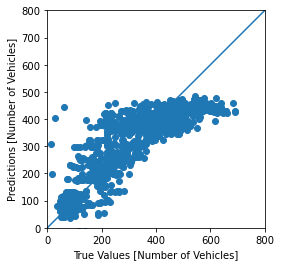

In [347]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, y)
plt.xlabel('True Values [Number of Vehicles]')
plt.ylabel('Predictions [Number of Vehicles]')
lims = [0, 800]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## MULTILINEAR REGRESSION WITH DNN

In [315]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [316]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 33)               67        
 ion)                                                            
                                                                 
 dense_26 (Dense)            (None, 64)                2176      
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 1)                 65        
                                                                 
Total params: 6,468
Trainable params: 6,401
Non-trainable params: 67
_________________________________________________________________


In [317]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 13.7 s


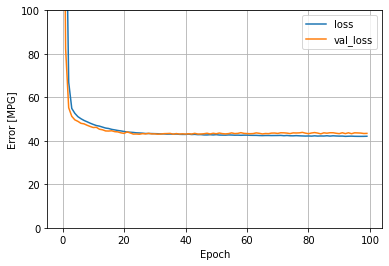

In [296]:
plot_loss(history)

In [318]:
test_results2 = {}

test_results2['linear_model'] = linear_model.evaluate(
    test_features,
    test_labels, verbose=0)

In [319]:
pd.DataFrame(test_results, index=['Mean absolute error [Number of Vehicles]']).T

,Mean absolute error [Number of Vehicles]
linear_model,59.6


In [320]:
dnn_model.compile(optimizer='sgd',
              loss='mse',
              metrics=[tf.keras.metrics.Accuracy()])

37/37 [==============================] - 0s 1ms/step


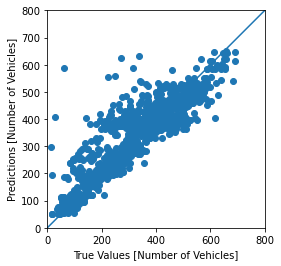

In [321]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Number of Vehicles]')
plt.ylabel('Predictions [Number of Vehicles]')
lims = [0, 800]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)